##### Scope
Fitting and tuning a logistic regression model on data to predict if the given individual is likely to earn more than 50,000. 


## 1. Data Prep & Simple Model Fit

##### 1.1. Import of the source file with data on clients' incomes

In [1]:
import pandas as pd
import numpy as np

income = pd.read_csv("../Data/income.csv")

income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


##### 1.2. Data prep before model fit

In [2]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)



##### 1.3. Intial fit of Logisitc Regression

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train[['age','hoursperweek','gender_ Male']], y_train)

print(f"Train Accurancy: {lr.score(X_train[['age','hoursperweek','gender_ Male']], y_train)}")
print(f"Test Accurancy: {lr.score(X_test[['age','hoursperweek','gender_ Male']], y_test)}")

Train Accurancy: 0.7551794230318193
Test Accurancy: 0.7631332082551595


In [4]:
print(f"Coeffcients: {[np.exp(i) for i in lr.coef_]}")
print(f"Intercept: {lr.intercept_}")

Coeffcients: [array([1.04274936, 1.04277524, 2.81958953])]
Intercept: [-5.3797418]


##### 1.4. Confusion matrix for the initial fit

In [5]:
def show_confusion_matrix(X_predict,y_train):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    
    confussion = confusion_matrix(y_train, X_predict)
    sns.heatmap(
        confussion,
        cmap="Blues",
        annot=True,
        fmt='g',
        square=True,
        xticklabels=['Negative','Positive'],
        yticklabels=['Negative','Positive']
    ).set(
        xlabel='Actual',
        ylabel='Predicted',
        title='Confusion matrix'
    );

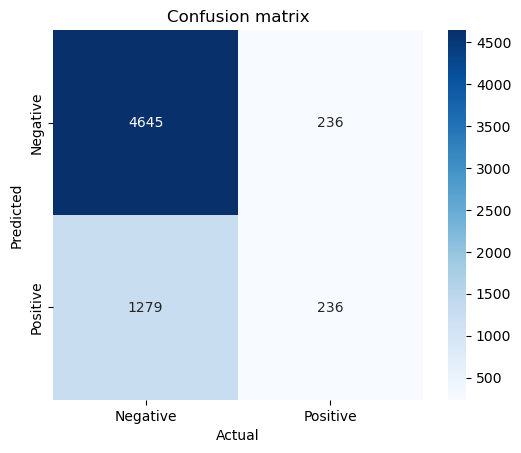

In [6]:
show_confusion_matrix(lr.predict(X_test[['age','hoursperweek','gender_ Male']]),y_test)

##### 1.5. Age vs. hoursperweek plot

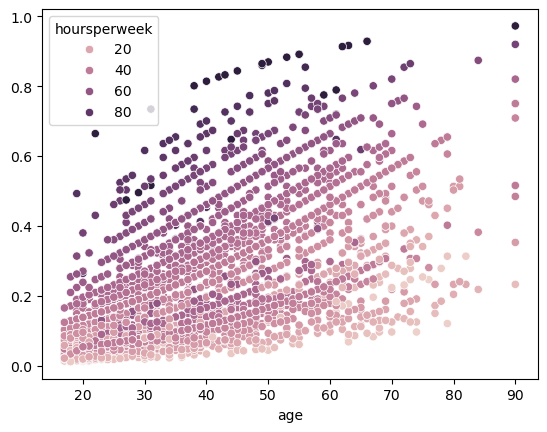

In [7]:
import seaborn as sns

sns.scatterplot(
    x=X_test['age'],
    y=lr.predict_proba(X_test[['age', 'hoursperweek', 'gender_ Male']])[:,1],
    hue=X_test['hoursperweek']
);

In [8]:
lr.predict_proba(X_test[['age', 'hoursperweek','gender_ Male']])[:70,1]

array([0.43023025, 0.20937884, 0.53427724, 0.28708806, 0.1649296 ,
       0.31346136, 0.35056809, 0.04588412, 0.28713885, 0.07954902,
       0.14840602, 0.23101394, 0.19093376, 0.12046638, 0.32253952,
       0.36985909, 0.45067727, 0.23105803, 0.32253952, 0.08188134,
       0.06056758, 0.13817784, 0.13937052, 0.23851141, 0.06056758,
       0.21647694, 0.59588912, 0.46106057, 0.09271529, 0.21110999,
       0.47147776, 0.12388544, 0.23105803, 0.05379406, 0.17688362,
       0.17087106, 0.12850648, 0.03462087, 0.05822909, 0.70907461,
       0.48198182, 0.20426301, 0.09628634, 0.27859738, 0.01528501,
       0.15935112, 0.33175354, 0.36985909, 0.12046638, 0.26208661,
       0.39963392, 0.57563792, 0.21645589, 0.68251654, 0.12850648,
       0.28059744, 0.34109825, 0.27864726, 0.16071926, 0.5755773 ,
       0.1894236 , 0.08924343, 0.17088864, 0.34119866, 0.03065144,
       0.63556842, 0.07954902, 0.41981883, 0.15382314, 0.165039  ])

In [9]:
lr.classes_

array([0, 1])

## 2. Model Tuning


##### 2.1. Fitting a Logistic Regression model using all available features

In [10]:
X_train, X_test, y_train, y_test = income_model_prep(income)

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train, y_train)

print(f"Train Accurancy: {lr.score(X_train, y_train)}")
print(f"Test Accurancy: {lr.score(X_test, y_test)}")

Train Accurancy: 0.8443436791494019
Test Accurancy: 0.849906191369606


C:\Users\jpopl\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


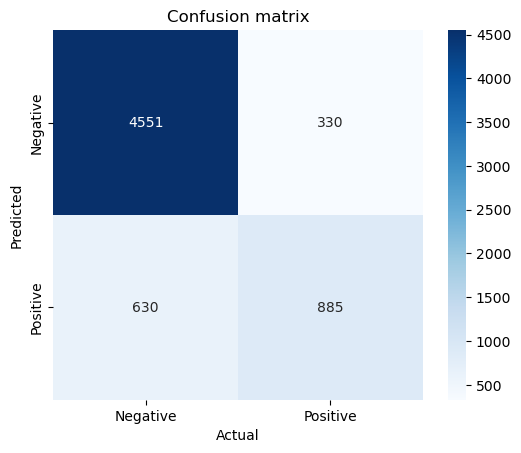

In [12]:
show_confusion_matrix(lr.predict(X_test),y_test)

In [13]:
print(f"Coeffcients: {list(map(np.exp, lr.coef_[0]))}")
print(f"Intercept: {lr.intercept_}")

#[np.exp(i) for i in lr.coef_]

Coeffcients: [0.9954365408674225, 1.0003121371873749, 1.0006759229202309, 1.0131329531320687, 1.1543621048874615, 0.8637021785846941, 0.8240570696370231, 1.1922241386244758, 0.6357544843492621, 0.8996213238942375, 0.9904685809417246, 0.7093638201982345, 0.9005066676601257, 0.9264996292609194, 0.8543887622662016, 0.7430861223701816, 0.8223461669064805, 1.0018832294368873, 0.9448127665199888, 2.0234606961904333, 1.256869244254845, 0.3861399518819998, 1.7701129664747717, 0.9744565101369852, 1.2642317583720621, 0.7143281738788447, 1.0157954094354393, 3.0182790161543402, 0.9273956234778755, 0.2469474092208037, 0.845300339101018, 0.8915064997139798, 0.7685386758708074, 0.7240453336230498, 2.4263477159463203, 0.7108941439098362, 0.7153780477661359, 0.709509160081597, 0.49683871847325345, 0.9641810905794564, 2.0672937474177675, 1.0132672838747037, 1.174692287009872, 1.1573141638397624, 0.8401524525150953, 0.6454169242997672, 0.7650923363672879, 0.35746916619181407, 0.5634150092855253, 1.333250

In [14]:
coefficinets_list = pd.DataFrame({'Parameter': X_test.columns, 'Coef.': list(map(np.exp, lr.coef_[0]))})
coefficinets_list.sort_values(by='Coef.').head(20)

,Parameter,Coef.
29,maritalstatus_ Never-married,0.246947
47,relationship_ Own-child,0.357469
21,EdType_ HS-grad,0.386140
38,occupation_ Other-service,0.496839
48,relationship_ Unmarried,0.563415
8,JobType_ Self-emp-not-inc,0.635754
45,relationship_ Not-in-family,0.645417
51,race_ Black,0.656565
91,nativecountry_ United-States,0.680322
11,EdType_ 11th,0.709364


##### 2.2. Tuning the regularization paramters

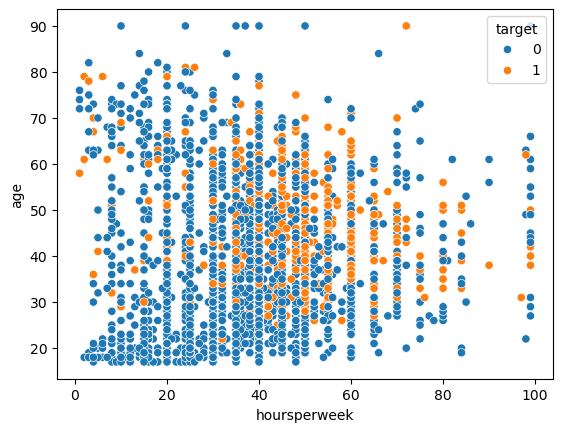

In [15]:
import seaborn as sns

sns.scatterplot(
    x=X_test['hoursperweek'],
    y=X_test['age'],
    hue=y_test
);

##### 2.3. Model preparation and data splitting

In [16]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop(["SalStat",'nativecountry','relationship'], axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)



In [17]:
X_train, X_test, y_train, y_test = income_model_prep(income)

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train, y_train)

print(f"Train Accurancy: {lr.score(X_train, y_train)}")
print(f"Test Accurancy: {lr.score(X_test, y_test)}")

Train Accurancy: 0.8417637401297787
Test Accurancy: 0.849906191369606


C:\Users\jpopl\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 2.4. Confusion matrix

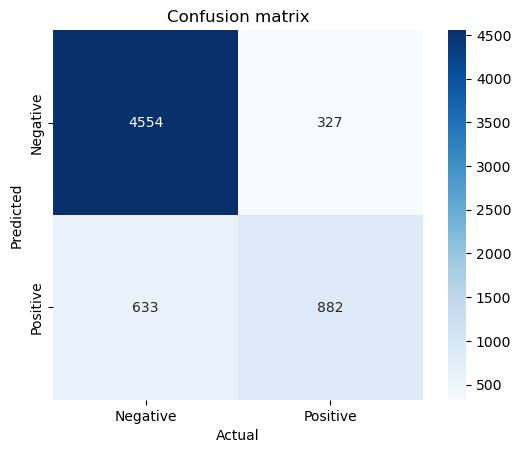

In [19]:
show_confusion_matrix(lr.predict(X_test),y_test)

##### 2.5. Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

##### 2.6. Grid search of optimal parameters

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {
#    'C': np.linspace(0.1,2,20),
    'C': np.linspace(0.05,0.1,10),    
#    'l1_ratio': np.linspace(0,1,11),    
#    'penalty': ['l1', 'l2', 'elasticnet'],
    'penalty': ['l1', 'l2']
}

gridsearch = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'C': 0.061111111111111116, 'penalty': 'l2'}

In [22]:
logreg = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=1000)

lr = logreg.fit(X_train_std, y_train)

print(f"Train Acc.: {lr.score(X_train_std, y_train)}")
print(f"Test Acc.: {lr.score(X_test_std, y_test)}")

Train Acc.: 0.8504026268470019
Test Acc.: 0.8556910569105691


##### 2.7. Confusion matrix after tuning

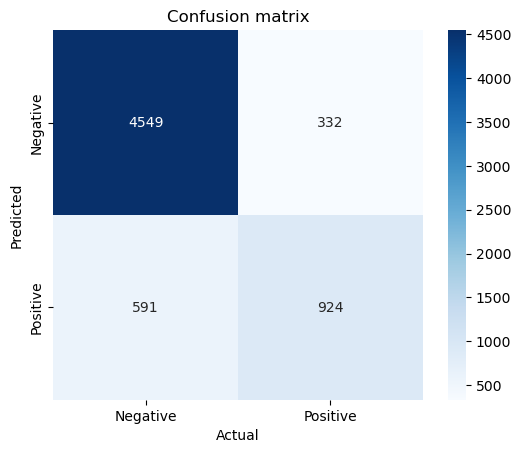

In [23]:
show_confusion_matrix(lr.predict(X_test_std),y_test)